# Latar Belakang

### Industri SaaS Sales telah menjadi salah satu sektor yang berkembang pesat dalam ekonomi digital modern, namun dengan pertumbuhan yang pesat juga datang tantangan yang kompleks. Dalam upaya untuk tetap kompetitif dan menghasilkan pertumbuhan yang berkelanjutan, perusahaan SaaS Sales harus memahami dengan baik karakteristik pelanggan mereka serta dinamika pasar yang terus berubah. Salah satu aspek penting yang perlu dipertimbangkan adalah tingkat keloyalan pelanggan dan pola pembelian dari masing-masing segmen pelanggan seiring waktu. Selain itu, dampak dari peristiwa global seperti pandemi Covid-19 juga memainkan peran krusial dalam mengubah perilaku konsumen dan tren penjualan. Oleh karena itu, evaluasi tren penjualan selama periode pandemi menjadi kunci dalam mengadaptasi strategi pemasaran perusahaan. Selain itu, dalam upaya untuk meningkatkan profitabilitas bisnis, perusahaan juga perlu mengevaluasi peran pemberian diskon pada produk dan memahami hubungannya dengan profit yang dihasilkan. Dengan pemahaman yang komprehensif tentang tantangan ini, perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif dan meningkatkan kinerja mereka dalam pasar yang semakin kompetitif.

# Stakeholder

#### Stakeholder dalam penelitian ini meliputi manajemen perusahaan teknologi cloud, tim penjualan dan pemasaran dan tim keuangan. Mereka memiliki kepentingan dalam memahami kinerja penjualan AWS, strategi penjualan, analisis keuangan, dan ekstraksi wawasan data untuk pengambilan keputusan yang lebih baik dalam mengelola operasi penjualan.

# Rumasan Masalah
### 1. Pelanggan Saas Sales memiliki karakteristik yang bervariasi. Untuk meningkatkan efisiensi strategi pemasaran, Bagaimana memahami karakteristik pelanggan serta tingkat keloyalan mereka dalam konteks penjualan perangkat lunak sebagai layanan (SaaS Sales), sambil mengidentifikasi pola pembelian dari masing-masing segmen pelanggan seiring waktu?
### 2. Pada periode Maret-Mei 2020 dan Juli-Desember 2021, terjadi wabah pandemi Covid-19. Sehingga, penting untuk mengevaluasi tren penjualan pelanggan SAAS Sales dari tahun 2020 hingga 2023 dan menentukan apakah pandemi Covid-19 memiliki pengaruh terhadap tren penjualan pelanggan SAAS Sales selama periode tersebut.
### 3. Dalam konteks analisis strategi penjualan, peran pemberian diskon pada produk menjadi penting untuk dievaluasi. Sebagai bagian dari strategi pemasaran, pemberian diskon dapat berdampak langsung pada profitabilitas bisnis. Oleh karena itu, penting untuk memahami hubungan antara produk yang diberikan diskon dengan profit yang dihasilkan.

# Goals
### 1. Meningkatkan efisiensi strategi pemasaran SaaS Sales dengan memahami karakteristik pelanggan, tingkat keloyalan, dan pola pembelian seiring waktu. Dengan menganalisis perilaku pembelian dan preferensi produk, strategi pemasaran dapat dioptimalkan untuk memenuhi kebutuhan pelanggan yang beragam, meningkatkan retensi pelanggan, dan mengoptimalkan penjualan. 
### 2. Mengevaluasi tren penjualan pelanggan SAAS Sales dari tahun 2020 hingga 2023, lebih tepatnya pada bulan Maret-Mei 2020 dan Juli-Desember 2021 dan menentukan dampak pandemi Covid-19 terhadap tren penjualan. Ini bertujuan untuk memahami pola pembelian pelanggan serta mengidentifikasi perubahan yang terjadi selama periode pandemi, sehingga memungkinkan penyusunan strategi yang responsif dan efektif.
### 3. Memahami hubungan antara pemberian diskon pada produk dengan profit yang dihasilkan dalam konteks analisis strategi penjualan. Hal ini bertujuan untuk memberikan wawasan yang lebih baik kepada pemangku kepentingan dalam merancang strategi pemasaran yang efektif, serta mengoptimalkan penggunaan pemberian diskon untuk mencapai tujuan profitabilitas bisnis.

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from scipy.stats import kstest # type: ignore
from scipy.stats import shapiro
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
import datetime as dt
import folium # type: ignore
from folium.plugins import HeatMap, MarkerCluster # type: ignore
# import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
c:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
c:\Program Files\Microsoft SQL Server\150\PYTHON_SERVER\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this 

# Data Understanding

### Menampilkan Dataset

In [3]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head(), df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Dataset ini terdiri dari 19 kolom, yaitu:
| No. | Column Name    | Description                                                |
|----|----------------|------------------------------------------------------------|
| 1  | Row ID         | Identifikasi unik untuk setiap transaksi.                  |
| 2  | Order ID       | Identifikasi unik untuk setiap pesanan.                    |
| 3  | Order Date     | Tanggal ketika pesanan ditempatkan.                         |
| 4  | Date Key       | Representasi numerik dari tanggal pesanan (YYYYMMDD).       |
| 5  | Contact Name   | Nama orang yang menempatkan pesanan.                       |
| 6  | Country        | Negara tempat pesanan ditempatkan.                         |
| 7  | City           | Kota tempat pesanan ditempatkan.                            |
| 8  | Region         | Wilayah tempat pesanan ditempatkan.                         |
| 9  | Subregion      | Subwilayah tempat pesanan ditempatkan.                      |
| 10 | Customer       | Nama perusahaan yang menempatkan pesanan.                  |
| 11 | Customer ID    | Identifikasi unik untuk setiap pelanggan.                   |
| 12 | Industry       | Industri yang dimiliki oleh pelanggan.                      |
| 13 | Segment        | Segmen pelanggan (SMB, Strategis, Enterprise, dll.).       |
| 14 | Product        | Produk yang dipesan.                                       |
| 15 | License        | Kunci lisensi untuk produk.                                |
| 16 | Sales          | Jumlah penjualan total untuk transaksi.                    |
| 17 | Quantity       | Jumlah total barang dalam transaksi.                       |
| 18 | Discount       | Diskon yang diterapkan pada transaksi.                     |
| 19 | Profit         | Keuntungan dari transaksi.                                  |

### Informasi Data Type

In [4]:
print(f'Jumlah baris dan kolom pada dataset Saas Sales adalah {df.shape}')
df.info()

Jumlah baris dan kolom pada dataset Saas Sales adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discou

Dari output tersebut, kita bisa mengetahui bahwa dataset SaaS-Sales memiliki 9994 baris dan 19 kolom. Setiap kolom memiliki tipe data yang berbeda-beda, yang antaranya terdiri dari:

`Float`: Sales, Discount, dan Profit

`int`: Row ID, Date Key, Customer ID, dan Quantity

`object`: Order ID, Order Date, Contact Name, Country, City, Region, Subregion, Customer, Industry, Segment, Product, dan License

Dari informasi yang diberikan, terlihat bahwa kolom `Order Date` memiliki tipe data yang salah atau tidak sesuai dengan data yang sebenarnya. Hal ini menunjukkan bahwa perlu dilakukan perubahan tipe data pada tahap data cleaning.

Dari semua nama kolom, ada satu nama kolom yang tipe data nya masih belum sesuai, yaitu `Order Date` seharusnya bertipe data `datetime`, sehingga perlu dilakukan perubahan tipe data yang akan diproses pada tahapan *data cleaning*. Dan juga, informasi di atas sudah cukup menjelaskan bahwa dataset Saas Sales tidak memiliki *missing values* pada setiap kolomnya, lebih detailnya akan dibahas pada tahapan *Data Cleaing & Preparation*.

# Descriptive Statistic
Berikut adalah ringkasan menyeluruh tentang dataset SaaS-Sales tanpa melakukan pengujian hipotesis. Proses ini membantu kita untuk secara jelas menyajikan data dan membuat kesimpulan awal tentang karakteristik data yang diamati, baik pada kolom kategorikal maupun numerikal.

## Numerik

In [5]:
numerik = df.select_dtypes(include='number').drop(columns=['Row ID', 'Date Key','Customer ID'])

In [6]:
numerik.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [7]:
numerik.nunique()

Sales       5825
Quantity      14
Discount      12
Profit      7287
dtype: int64

Dari data diatas, dapat kita simpulkan bahwa:
1. Kolom Sales memiliki mean 229.85, median 54.5, dan rentang nilai 0.44 - 22638.48.
2. Kolom Quantity memiliki mean 3.7, median 3 dan memiliki rentang nilai 1 - 14.
3. Kolom Discout memiliki mean 0.15, median 0,2 dan memiliki rentang nilai 0 - 0.8.
4. Kolom Profit memiliki mean 28.6, median 8.6 dan memiliki rentang nilai yaitu -6599.9 - 8399.9

# Distribusi Data

### Uji Normalitas Data

In [76]:
# Lakukan uji Shapiro-Wilk untuk data
statistic, p_value = shapiro(numerik)

# Interpretasi hasil uji
alpha = 0.05
if p_value > alpha:
    print("Tidak cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Hipotesis nol ditolak (data tidak terdistribusi normal)")

Hipotesis nol ditolak (data tidak terdistribusi normal)


### Outliers

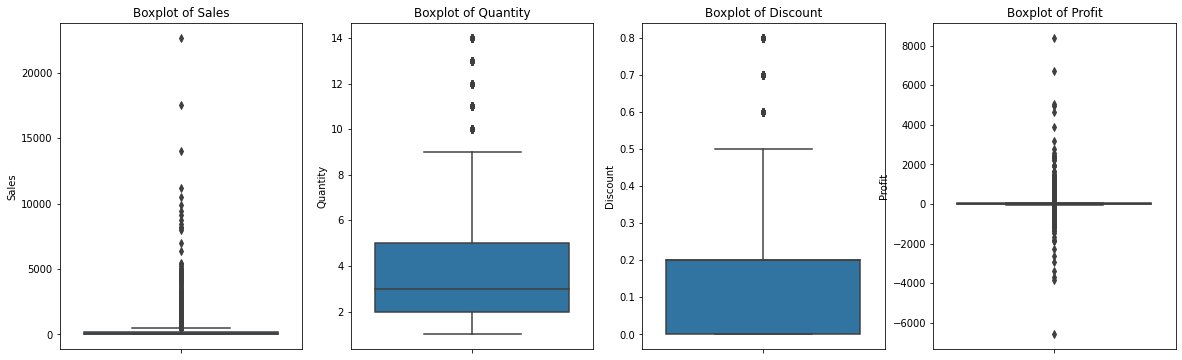

In [81]:
# Membuat subplots untuk setiap kolom
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Boxplot untuk kolom Sales
sns.boxplot(y='Sales', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Sales')

# Boxplot untuk kolom Quantity
sns.boxplot(y='Quantity', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Quantity')

# Boxplot untuk kolom Discount
sns.boxplot(y='Discount', data=df, ax=axes[2])
axes[2].set_title('Boxplot of Discount')

# Boxplot untuk kolom Profit
sns.boxplot(y='Profit', data=df, ax=axes[3])
axes[3].set_title('Boxplot of Profit')

plt.show()


In [13]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"Data {kolom} memiliki outliers {jumlah_outliers}")

Data Sales memiliki outliers 1167
Data Quantity memiliki outliers 170
Data Discount memiliki outliers 856
Data Profit memiliki outliers 1881


# Korelasi
Menghitung korelasi antar data numerik, dengan menggunakan method spearman: `data tidak normal`


In [14]:
numerik.corr(method='spearman') 

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.327426,-0.056969,0.518407
Quantity,0.327426,1.000000,-0.000878,0.234491
Discount,-0.056969,-0.000878,1.000000,-0.543350
Profit,0.518407,0.234491,-0.543350,1.000000


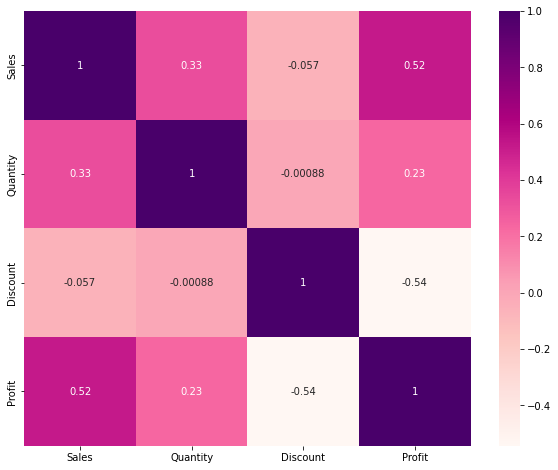

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(numerik.corr(method='spearman'), annot=True,cmap='RdPu')
plt.show()

Berdasarkan Heatmap diatas, dapat kita simpulkan bahwa `Discount` dan `Profit` memiliki korelasi yang negatif, yang artinya semakin tinggi Discount yang diberikan, maka semkain kecil `Profit` yang dihasilkan, sedangkan `Sales` dan `Profit` memiliki korelasi yang positif yang artinya semakin tinggi `Sales` maka semakin tinggi `Profit` yang dihasilkan

## Kategorik

In [18]:
kategorik = df.select_dtypes(exclude='number')

In [19]:
kategorik.describe()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [20]:
kategorik.nunique()

Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Industry          10
Segment            3
Product           14
License         9994
dtype: int64

Berdasarkan informasi diatas, dapat disumpulkan bahwa:
1. `Order ID`: memiliki 5.009 unique value.
2. `Order Date`: memiliki 1.237 unique value.
3. `Contact Name`: memiliki 793 unique value.
4. `Country`: memiliki 48 unique value.
5. `City`: memiliki 262 unique value.
6. `Region`: memiliki 3 unique value.
7. `Subregion`: memiliki 12 unique value.
8. `Customer`: memiliki 99 unique value.
9. `Industry`: memiliki 10 unique value.
10. `Segment`: memiliki 3 unique value.
11. `Product`: memiliki 14 unique value. 
12. `License`: memiliki 9.994 unique value.

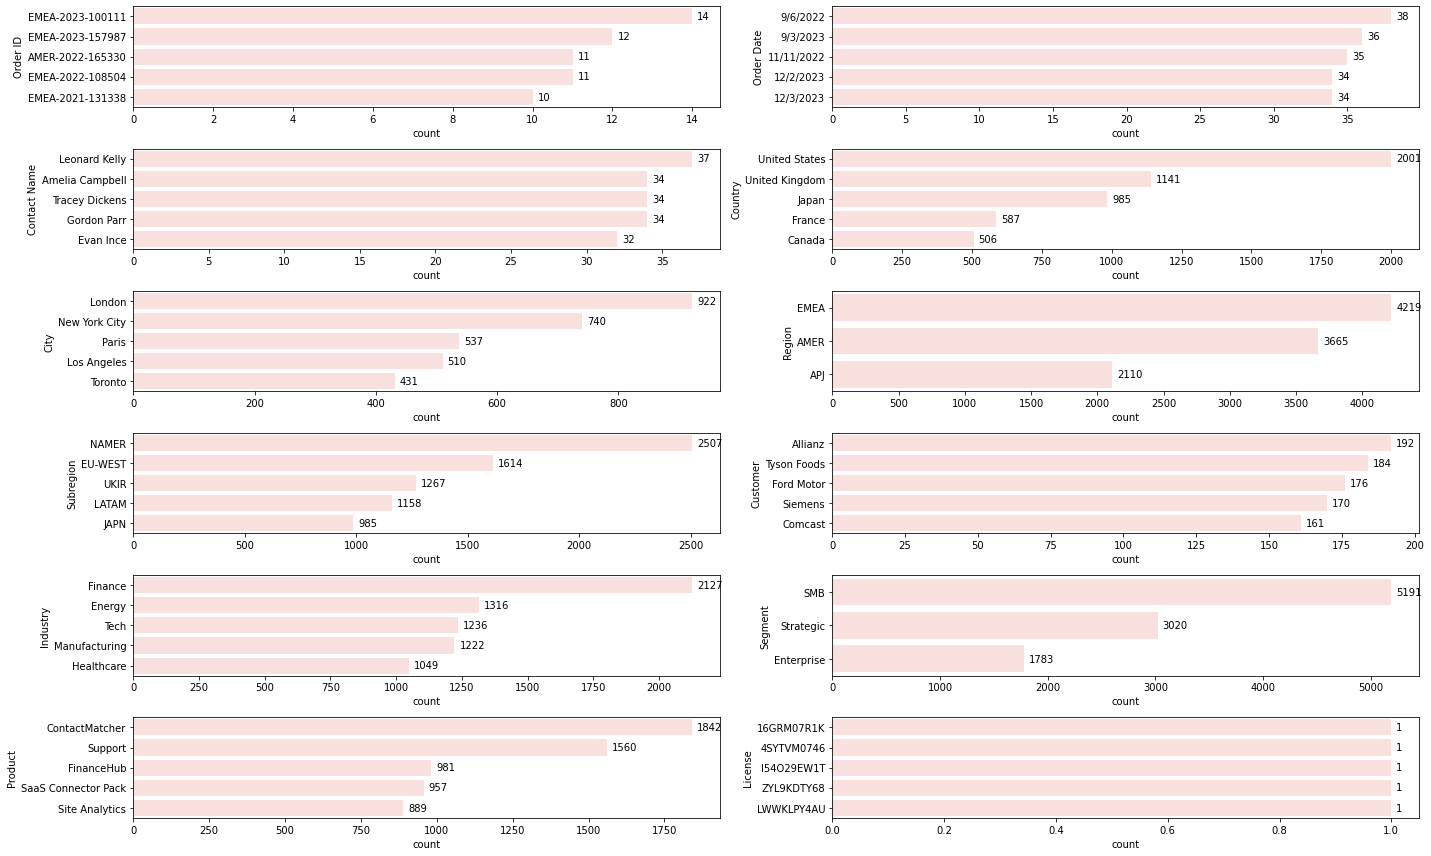

In [21]:
count = 0
fig = plt.figure(figsize=(20,12))
for i in kategorik.columns:
    count += 1
    ax = plt.subplot(6,2,count)
    col_palette = sns.color_palette("RdPu")
    sns.countplot(y=i, data=kategorik, order=kategorik[i].value_counts().sort_values(ascending=False).head(5).index, color=col_palette[0])
    ax.set_ylabel(i)
    
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    xytext=(5, 0), 
                    textcoords='offset points',
                    ha='left', va='center')

fig.tight_layout()
plt.show()


1. `Order ID`: EMEA-2023-100111, melakukan transaksi terbanyak yaitu sebanyak 14 kali dalam satu hari.
2. `Order Date`: Tanggal 9/6/2022, merupakan hari dimana transaksi terbanyak dilakukan yaitu sebanyak 38 kali transaksi.
3. `Contact Name`: Leonard Kelly merupakan PIC yang paling sering melakukan transaksi yaitu sebanyak 37 kali.
4. `Country`: Negara United States (US) paling sering melakukan transaksi yaitu sebanyak 2.001 kali.
5. `City`: Kota London paling sering melakukan transaksi yaitu sebanyak 922 kali.
6. `Region`: Wilayah EMEA (Europe, the Middle East and Africa) paling sering melakukan transaksi yaitu sebanyak 4.219 kali.
7. `Subregion`: sub-Wilayah NAMER (North America) paling sering melakukan transaksi yaitu sebanyak 2.507 kali.
8. `Customer`: Allianz merupakan customer yang paling sering melakukan transaksi yaitu sebanyak 192 kali.
9. `Industry`: Industri Finance merupakan industri yang paling sering melakukan transaksi yaitu sebanyak 2.127 kali.
10. `Segment`: Segmen SMB merupakan segmen yang paling sering melakukan transaksi yaitu sebanyak 5.191 kali.
11. `Product`: Contact Matcher merupakan produk yang paling sering ditransaksikan yaitu sebanyak 1.842 kali.
12. `License`: setiap transaksi memiliki kode License yang berbeda.

# Unique Values

In [22]:
listData= []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique Value', 'Unique Value Description'],
                     data=listData)
tabelDesc

,Column Name,Number of Unique Value,Unique Value Description
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
5,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."


Dari Unique Values diatas, kita bisa menarik kesimpulan bahwa:
- Kolom `Row ID`, `Order ID`, dan `Customer ID` berisi nomor unik untuk setiap baris, setiap pesanan, dan setiap pelanggan. Karena informasi ini tidak berguna untuk analisis, kita bisa menghapusnya.
- Kolom `Date Key` hampir sama dengan kolom `Order Date`. Ini membuat analisis tanggal transaksi menjadi rumit, jadi lebih baik menghapusnya.
- Kolom `Contact Name` berisi nama orang yang melakukan transaksi untuk perusahaan. Kita hanya perlu kolom `Customer`, jadi kolom ini bisa dihapus.
- Kolom `License` memiliki nilai unik yang sama dengan jumlah total data pada dataset. Karena itu, kita bisa menghapusnya.
- Kolom `Subregion` mirip dengan kolom `Region` karena keduanya berisi informasi tentang daerah bisnis. Untuk menghindari kebingungan, lebih baik menghapus kolom Subregion.

# Data Cleaning & Preparation
Tahap ini bertujuan untuk mengidentifikasi dan memperbaiki atau menghapus data yang anomali dari dataset. Anomali tersebut dapat berupa data yang tidak konsisten, tidak akurat, duplikat, salah format, atau hal lain yang dapat mengganggu proses analisis, seperti kolom-kolom yang tidak relevan untuk dianalisis. Setiap tindakan yang diambil untuk menangani anomali akan didasarkan pada pengetahuan domain atau analisis statistik, dan akan disertai dengan justifikasi untuk langkah-langkah yang diambil.

#### Kode df_clean = df.copy() membuat salinan independen dari DataFrame df. Dengan salinan ini, kita dapat melakukan manipulasi data tanpa mempengaruhi DataFrame asli, menjaga integritas data saat melakukan eksperimen atau analisis tambahan.

In [23]:
df_clean = df.copy()

## 1. Changing Data Type
Seperti yang sudah kita ketahui pada tahapan Data Understanding, kolom Order Date memiliki tipe data yang tidak sesuai dengan data yang dimiliki oleh kolom tersebut, sehingga kita perlu mengubahnya.

In [24]:
df_clean["Order Date"] = df_clean["Order Date"].apply(pd.to_datetime)
tipe_data_order_date = df_clean["Order Date"].dtypes

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

## 2. Missing Values

In [25]:
df_clean.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

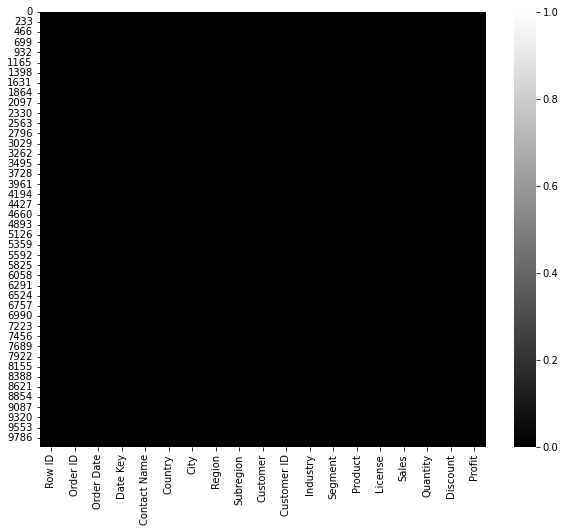

In [26]:
plt.figure(figsize = (10, 8))
sns.heatmap(data = df_clean.isnull(), vmin = 0, vmax = 1, cmap = "gray")
plt.show()

Secara umum, *dataset* SaaS-Sales tidak memiliki *missing values* di setiap kolomnya, sehingga tidak perlu melakukan penanganan *missing values*. Ini terlihat jelas ketika nilai 0 (nol) muncul di setiap kolom dalam output dan *heatmap* menunjukkan keseluruhan area berwarna hitam tanpa adanya garis putih yang menandakan keberadaan *missing values*.

### Disini saya menghapus kolom yang semua datanya berisi unique value, yaitu kolom Row ID dan License. Tujuan saya menghapus kolom tersebut supaya bisa terlihat baris-baris yang duplicate.

In [27]:
df_clean.drop(['Row ID', 'License'], axis=1, inplace=True)
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


In [28]:
duplicate_rows = df_clean[df_clean.duplicated()]
display(df_clean[df_clean.duplicated()])
duplicate_rows_count = len(duplicate_rows)
print(f' jumlah baris duplikat pada Dataset Saas Sales sebanyak {duplicate_rows_count} baris')

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
3406,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588


 jumlah baris duplikat pada Dataset Saas Sales sebanyak 1 baris


In [29]:
df_clean[df_clean['Date Key'] == 20200423]

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
1448,EMEA-2020-112564,2020-04-23,20200423,Victor Walsh,France,Paris,EMEA,EU-WEST,Allianz,1080,Finance,Strategic,ContactMatcher,2.502,3,0.7,-1.7514
3405,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3406,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,281.372,2,0.3,-12.0588
3407,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,ContactMatcher,7.488,8,0.7,-5.2416
3408,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,SaaS Connector Pack,22.336,4,0.2,7.8176
9289,AMER-2020-111857,2020-04-23,20200423,Boris Underwood,United States,Los Angeles,AMER,NAMER,Itochu,1032,Finance,Enterprise,Support,48.910,1,0.0,22.9877


In [30]:
# Menghapus baris-baris yang diduplikasi dari DataFrame df_clean2
df_clean.drop_duplicates(inplace=True)


In [31]:
duplicate_rows = df_clean[df_clean.duplicated()]
display(df_clean[df_clean.duplicated()])
duplicate_rows_count = len(duplicate_rows)
print(f' jumlah baris duplikat pada Dataset Saas Sales sebanyak {duplicate_rows_count} baris')

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit


 jumlah baris duplikat pada Dataset Saas Sales sebanyak 0 baris


## Handling Outlier

In [32]:
def cek_outliers(kolom, df_clean):
  q1 = numerik[[kolom]].describe().loc['25%'][0]
  q3 = numerik[[kolom]].describe().loc['75%'][0]
  iqr = q3 - q1
  whisker = 1.5 * iqr
  upper_bound = float(q3 + whisker)
  lower_bound = float(q1 - whisker)
  display(df_clean[(df_clean[kolom] > upper_bound) | (df_clean[kolom] < lower_bound)].sort_values(kolom))

In [33]:
cek_outliers('Profit', df_clean)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
7772,AMER-2022-108196,2022-11-26,20221126,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,4499.985,5,0.7,-6599.9780
683,EMEA-2023-168116,2023-11-05,20231105,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,7999.980,4,0.5,-3839.9904
9774,APJ-2020-169019,2020-07-26,20200726,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,2177.584,8,0.8,-3701.8928
3011,EMEA-2023-134845,2023-04-18,20230418,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,2549.985,5,0.7,-3399.9800
4991,APJ-2023-122714,2023-12-08,20231208,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,EMEA-2020-116904,2020-09-23,20200923,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,1029,Healthcare,SMB,ContactMatcher,9449.950,5,0.0,4630.4755
9039,AMER-2022-117121,2022-12-18,20221218,Carolyn Parr,Brazil,São Paulo,AMER,LATAM,Valero Energy,1093,Energy,SMB,ContactMatcher,9892.740,13,0.0,4946.3700
4190,APJ-2023-166709,2023-11-18,20231118,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,10499.970,3,0.0,5039.9856
8153,AMER-2023-140151,2023-03-24,20230324,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,13999.960,4,0.0,6719.9808


Berdasarkan data table di atas, batas bawah dari kolom `Profit` adalah -6599.97, apabila dicermati lebih lanjut nilai Profit tersebut bernilai negatif disebabkan oleh nilai pada kolom `Discount` yang tinggi sebesar 70% dan pada batas atas dari kolom `Profit` adalah 8399.97, Profit tinggi tersebut dapat dicapai ketika Discount yang diberikan 0%. Sehingga tidak perlu dilakukan handling outliers pada kolom `Profit` karna outliers tersebut masih dikatakan wajar, dan dapat disimpulkan bahwa tidak ada anomali data. 

In [34]:
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


# EDA (Exploratory Data Analysis)

## 1. Pelanggan Saas Sales memiliki karakteristik yang bervariasi. Untuk meningkatkan efisiensi strategi pemasaran, penting untuk memahami karakteristik pelanggan serta tingkat keloyalan mereka, sambil melihat pola pembelian dari masing-masing segmen seiring waktu dan mengidentifikasi produk atau layanan yang paling diminati oleh setiap segmen.

#### Menghitung RFM


,Customer,RFM_Score,Customer_segment
0,AT&T,3.51,Medium Value Customers
1,Abbott Laboratories,1.09,Low Value Customers
2,Aetna,3.54,Medium Value Customers
3,Airbus,3.51,Medium Value Customers
4,Allianz,4.85,High Value Customers


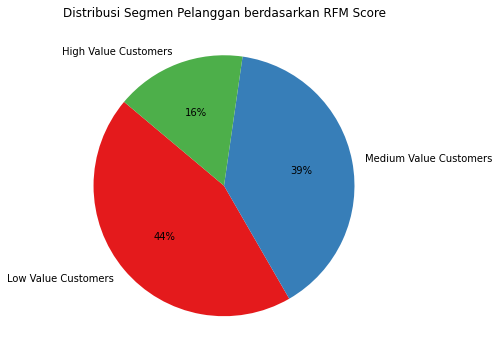

In [52]:
# Asumsi df_clean adalah DataFrame yang sudah Anda miliki
# Mengonversi kolom 'Order Date' ke tipe datetime
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'], errors='coerce')

# Menghitung Recency
df_recency = df_clean.groupby(by='Customer', as_index=False)['Order Date'].max()
df_recency.columns = ['Customer', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

# Menghitung Frequency
frequency_df = df_clean.drop_duplicates().groupby(by=['Customer'], as_index=False)['Order Date'].count()
frequency_df.columns = ['Customer', 'Frequency']

# Menghitung Monetary
df_clean['Total'] = df_clean['Sales'] * df_clean['Quantity']
monetary_df = df_clean.groupby(by='Customer', as_index=False)['Total'].sum()
monetary_df.columns = ['Customer', 'Monetary']

# Menggabungkan Recency, Frequency, dan Monetary
rf_df = df_recency.merge(frequency_df, on='Customer')
rfm_df = rf_df.merge(monetary_df, on='Customer').drop(columns='LastPurchaseDate')

# Memberikan peringkat pelanggan berdasarkan RFM
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# Normalisasi peringkat pelanggan
rfm_df['R_rank_norm'] = (rfm_df['R_rank'] / rfm_df['R_rank'].max()) * 100
rfm_df['F_rank_norm'] = (rfm_df['F_rank'] / rfm_df['F_rank'].max()) * 100
rfm_df['M_rank_norm'] = (rfm_df['M_rank'] / rfm_df['M_rank'].max()) * 100

# Menghapus kolom peringkat asli
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

# Menghitung RFM_Score
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank_norm'] + 0.28 * rfm_df['F_rank_norm'] + 0.57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

# Menentukan segmen pelanggan berdasarkan RFM_Score dengan tiga segmen
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4, "High Value Customers",
                                      np.where(rfm_df['RFM_Score'] > 2.5, "Medium Value Customers",
                                               "Low Value Customers"))

# Menampilkan beberapa baris hasil
display(rfm_df[['Customer', 'RFM_Score', 'Customer_segment']].head(5))

# Visualisasi Pie Chart untuk distribusi segmen pelanggan
plt.figure(figsize=(10, 6))
plt.pie(rfm_df['Customer_segment'].value_counts(),
        labels=rfm_df['Customer_segment'].value_counts().index,
        autopct='%.0f%%',
        startangle=140,
        colors=sns.color_palette("Set1"))
plt.title('Distribusi Segmen Pelanggan berdasarkan RFM Score')
plt.show()


### Dengan melihat persentase kontribusi dari setiap segment, beberapa insight yang bisa diambil adalah:

- **Segmen High Value**:
    - Strategi yang Direkomendasikan: `Dipertahankan dan Diprioritaskan`.
    - Alasan: Meskipun jumlahnya lebih sedikit, pelanggan dalam segmen ini memiliki nilai transaksi yang tinggi dan memberikan kontribusi besar terhadap pendapatan perusahaan.

- **Segmen Medium Value**:
    - Strategi yang Direkomendasikan: `Dipertahankan dan Ditingkatkan`.
    - Alasan: Segmen ini memiliki jumlah pelanggan yang relatif banyak, menunjukkan bahwa mereka adalah basis pelanggan yang penting dengan nilai transaksi dan frekuensi yang cukup stabil.
   
- **Segmen Low Value**:
    - Strategi yang Direkomendasikan: `Ditingkatkan atau Dioptimalkan`.
    - Alasan: Penyumbang terbanyak adalah segmen Low Value Customers, yang jumlah pelanggannya terbatas dengan nilai transaksi yang rendah. Meskipun demikian, segmen ini masih memiliki potensi untuk ditingkatkan.

### Melihat pola pembelian dari masing-masing segmen seiring waktu

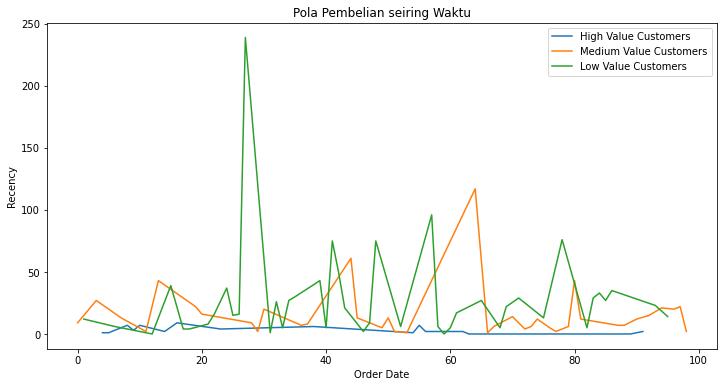

In [108]:
# Memisahkan data menjadi masing-masing segmen
high_value_customers = rfm_df[rfm_df['Customer_segment'] == 'High Value Customers']
medium_value_customers = rfm_df[rfm_df['Customer_segment'] == 'Medium Value Customers']
low_value_customers = rfm_df[rfm_df['Customer_segment'] == 'Low Value Customers']

# Analisis pola pembelian seiring waktu
plt.figure(figsize=(12, 6))
plt.plot(high_value_customers['Recency'], label='High Value Customers')
plt.plot(medium_value_customers['Recency'], label='Medium Value Customers')
plt.plot(low_value_customers['Recency'], label='Low Value Customers')
plt.xlabel('Order Date')
plt.ylabel('Recency')
plt.title('Pola Pembelian seiring Waktu')
plt.legend()
plt.show()


In [105]:
rfm_df

,Customer,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,AT&T,9,151,129821.37,51.79,91.41,64.65,3.51,Medium Value Customers
1,Abbott Laboratories,12,67,67601.49,47.69,19.70,16.16,1.09,Low Value Customers
2,Aetna,21,153,135267.73,29.74,92.93,70.71,3.54,Medium Value Customers
3,Airbus,27,123,153923.48,21.03,74.75,80.81,3.51,Medium Value Customers
4,Allianz,1,192,207084.97,94.87,100.00,95.96,4.85,High Value Customers
...,...,...,...,...,...,...,...,...,...
94,Volkswagen,21,134,165610.15,29.74,80.81,82.83,3.71,Medium Value Customers
95,Walgreens,14,68,57248.56,40.51,21.21,12.12,0.95,Low Value Customers
96,Walmart,20,115,105912.77,32.31,66.16,47.47,2.52,Medium Value Customers
97,Walt Disney,22,103,143245.51,26.67,56.06,74.75,3.12,Medium Value Customers


Insight yang bisa diambil dari plot diatas adalah:
- **High Value Customers**:
    - Insight: Pelanggan dalam segmen High Value cenderung sering melakukan transaksi.
    - Dampak: Segmen ini adalah sumber pendapatan utama perusahaan. Fokus pada retensi dan meningkatkan nilai transaksi per pelanggan dapat sangat menguntungkan.

- **Medium Value Customers**:
    - Insight: Pelanggan dalam segmen Medium Value melakukan transaksi dengan frekuensi yang lebih rendah dibandingkan dengan High Value Customers.
    - Dampak: Meskipun jumlah pelanggan dalam segmen ini relatif banyak, mereka cenderung tidak terlalu aktif. Strategi dapat difokuskan untuk meningkatkan frekuensi transaksi dan meningkatkan keterlibatan mereka.

- **Low Value Customers**:
    - Insight: Pelanggan dalam segmen Low Value melakukan transaksi dengan frekuensi yang paling rendah dibandingkan dengan Segment High dan Medium Value.
    - Dampak: Meskipun jumlah pelanggan dalam segmen ini paling banyak, ada potensi untuk meningkatkan nilai transaksi mereka. Fokus pada strategi untuk meningkatkan keterlibatan dan memperkenalkan penawaran yang menarik mungkin diperlukan untuk mengubah perilaku pembelian mereka.

### Mengidentifikasi produk atau layanan yang paling diminati oleh setiap segmen.

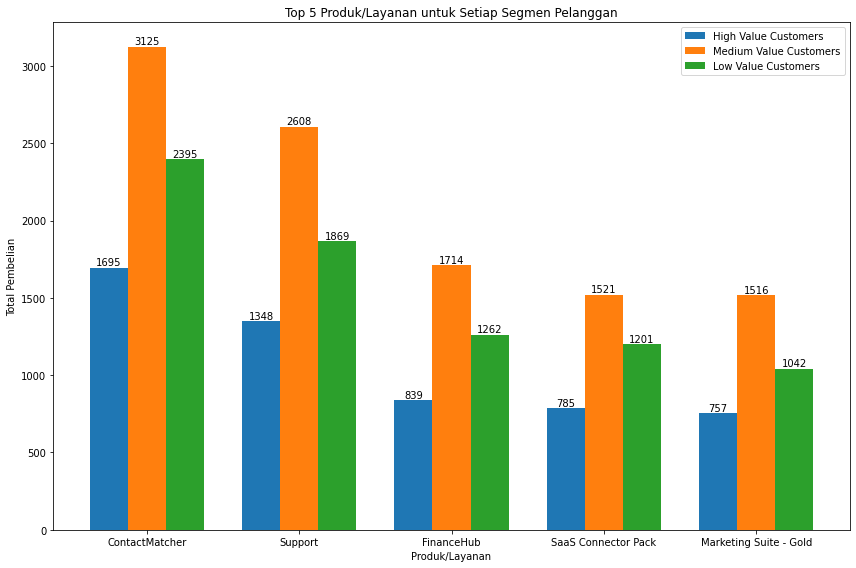

In [51]:
# Identifikasi produk atau layanan yang paling diminati oleh setiap segmen
top_products_high_value = df_clean[df_clean['Customer'].isin(high_value_customers['Customer'])].groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products_medium_value = df_clean[df_clean['Customer'].isin(medium_value_customers['Customer'])].groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products_low_value = df_clean[df_clean['Customer'].isin(low_value_customers['Customer'])].groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

# Menyiapkan data
segments = ['High Value Customers', 'Medium Value Customers', 'Low Value Customers']
top_products = [top_products_high_value, top_products_medium_value, top_products_low_value]

# Mengatur lebar bar
bar_width = 0.25
index = np.arange(len(top_products_high_value))

# Membuat plot
plt.figure(figsize=(12, 8))

# Plot untuk setiap segmen
for i in range(len(segments)):
    bars = plt.bar(index + i * bar_width, top_products[i], bar_width, label=segments[i])
    # Menambahkan anotasi untuk setiap bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(int(bar.get_height())), ha='center', va='bottom')

# Menambahkan label, judul, dan legend
plt.xlabel('Produk/Layanan')
plt.ylabel('Total Pembelian')
plt.title('Top 5 Produk/Layanan untuk Setiap Segmen Pelanggan')
plt.xticks(index + bar_width, top_products_high_value.index)
plt.legend()

plt.tight_layout()
plt.show()

Insight yang bisa diambil dari bar plot diatas adalah:
- **Segmen High Value**:
    - Produk Paling Diminati: Produk ContactMatcher memiliki jumlah pelanggan tertinggi di segmen High Value, diikuti oleh Support dan FinanceHub.
    - Potensi Pengembangan: Produk dengan jumlah pelanggan yang tinggi dalam segmen High Value menunjukkan bahwa produk-produk ini memiliki daya tarik dan nilai yang tinggi bagi pelanggan dengan transaksi yang signifikan. Strategi untuk mempertahankan dan meningkatkan keterlibatan pelanggan dalam produk-produk ini dapat memberikan kontribusi besar terhadap pendapatan perusahaan.

- **Segmen Medium Value**:
    - Produk Paling Diminati: Produk ContactMatcher juga mendominasi dalam segmen Medium Value, diikuti oleh Support dan FinanceHub.
    - Potensi Pengembangan: Meskipun produk yang diminati serupa dengan segmen High Value, jumlah total pembelian dalam segmen Medium Value merupakan yang tertinggi di antara segmen-segmen lainnya. Hal ini menunjukkan bahwa meskipun pelanggan dalam segmen ini mungkin melakukan transaksi dengan nilai yang lebih rendah, namun karena jumlah pelanggan yang lebih besar, total pembelian menjadi tinggi. Diperlukan strategi untuk meningkatkan nilai transaksi per pelanggan dan meningkatkan keterlibatan untuk memanfaatkan potensi jumlah pelanggan yang signifikan ini secara lebih efektif.

- **Segmen Low Value**:
    - Produk Paling Diminati: ContactMatcher dan Support juga menjadi produk yang paling banyak diminati dalam segmen Low Value, dengan SaaS Connector Pack dan FinanceHub berada di posisi berikutnya.
    - Potensi Pengembangan: Meskipun jumlah pelanggan terbanyak, segmen ini memiliki nilai transaksi yang rendah. Diperlukan strategi untuk meningkatkan keterlibatan pelanggan dan memperkenalkan penawaran yang menarik agar dapat mengubah perilaku pembelian mereka dan meningkatkan nilai transaksi.

## 2. Pada periode Maret-Mei 2020 dan Juli-Desember 2021, terjadi wabah pandemi Covid-19. Sehingga, penting untuk mengevaluasi tren penjualan pelanggan SAAS Sales dari tahun 2020 hingga 2023 dan menentukan apakah pandemi Covid-19 memiliki pengaruh terhadap tren penjualan pelanggan SAAS Sales selama periode tersebut.
### Disini saya menggunakan metode analisa `Time Series`
#### Yang mana analisa ini menggunakan data historis penjualan Saas dari tahun ke  tahun untuk memahami pola dan trend dalam penjualan (sales), profit dan quantity. Melalui teknik statistik atau visualisasi seperti line plot, dan kita dapat melihat bagaimana kinerja penjualan berubah dari waktu ke waktu dan mengidentifikasi faktor-faktor yang mempengaruhinya.

#### Menambahkan kolom `Order Year` yang berisikan tahun berdasarkan kolom `Order Date`

In [37]:
df_clean['Month']=df_clean['Order Date'].dt.to_period('M')
df_clean.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,Sales,Quantity,Discount,Profit,Total,Month
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136,523.9200,2022-11
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820,2195.8200,2022-11
2,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714,29.2400,2022-06
3,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310,4787.8875,2021-10
4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164,44.7360,2021-10


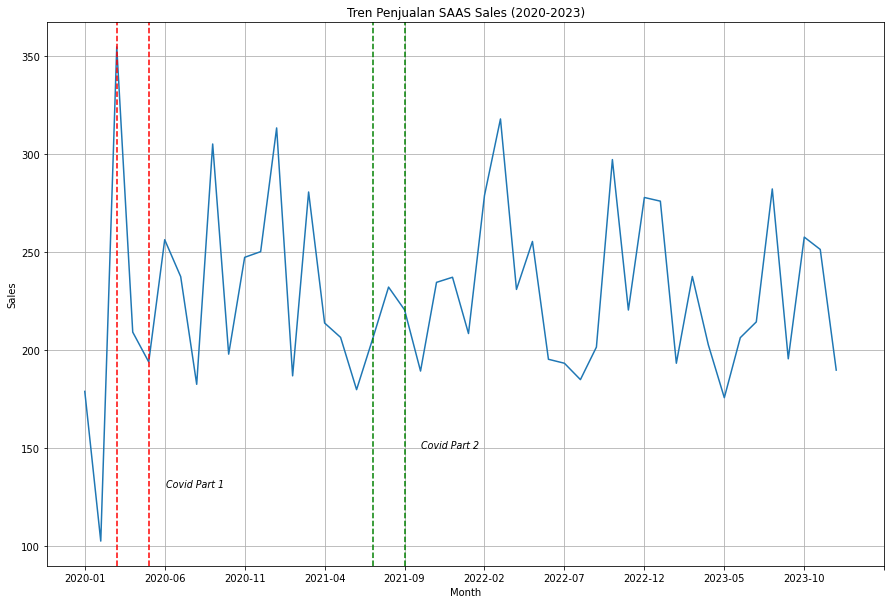

In [62]:
# Code for line plot
data = df_clean.groupby(['Month'])['Sales'].mean().reset_index()  # Menghitung rata-rata penjualan per bulan
plt.figure(figsize=(15, 10))
data['Month'] = data['Month'].astype(str)

# Line plot
sns.lineplot(data=data, x='Month', y='Sales')

# Menambahkan penanda untuk periode pandemi
plt.axvline(x=2, linestyle='--', color='red')  # Maret 2020
plt.axvline(x=4, linestyle='--', color='red')  # Mei 2020
plt.axvline(x=18, linestyle='--', color='green')  # Juli 2021
plt.axvline(x=20, linestyle='--', color='green')  # Desember 2021

# Menambahkan anotasi
plt.text(21.05, 150, 'Covid Part 2', fontsize=9.5, fontstyle='oblique')
plt.text(5.05, 130, 'Covid Part 1', fontsize=9.5, fontstyle='oblique')

# Konfigurasi plot
plt.title('Tren Penjualan SAAS Sales (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(0, 53, 5), rotation=0)  # Untuk menandai setiap 5 bulan
plt.grid(True)
plt.show()


In [109]:
data

,Month,Sales
0,2020-01,178.797808
1,2020-02,102.352298
2,2020-03,354.719803
3,2020-04,209.059500
4,2020-05,193.838418
5,2020-06,256.260204
6,2020-07,237.387364
7,2020-08,182.414827
8,2020-09,305.139369
9,2020-10,197.820082


In [72]:
# Filter data penjualan sebelum pandemi (Januari dan Februari)
sales_before_pandemic = df_clean[(df_clean['Month'].isin(['January', 'February']))]['Sales']

# Filter data penjualan selama pandemi (Maret, April, dan Mei)
sales_during_pandemic = df_clean[(df_clean['Month'].isin(['March', 'April', 'May']))]['Sales']

# Filter data penjualan setelah pandemi (Juni hingga Desember)
sales_after_pandemic = df_clean[(df_clean['Month'].isin(['June', 'July', 'August', 'September', 'October', 'November', 'December']))]['Sales']

# Tampilkan data penjualan
print("Data Penjualan Sebelum Pandemi:")
print(sales_before_pandemic)

print("\nData Penjualan Selama Pandemi:")
print(sales_during_pandemic)

print("\nData Penjualan Setelah Pandemi:")
print(sales_after_pandemic)


Data Penjualan Sebelum Pandemi:
Series([], Name: Sales, dtype: float64)

Data Penjualan Selama Pandemi:
Series([], Name: Sales, dtype: float64)

Data Penjualan Setelah Pandemi:
Series([], Name: Sales, dtype: float64)


Insight yang bisa diambil adalah:
1. Peningkatan Penjualan Selama Awal Pandemi: Terjadi lonjakan penjualan yang signifikan pada Maret 2020 (354.719803), yang mungkin menunjukkan bahwa ada permintaan tinggi untuk layanan SAAS selama awal pandemi.
2. Tren Penjualan Pasca-Pandemi Pertama: Setelah periode pertama pandemi, terlihat ada penurunan penjualan pada bulan-bulan berikutnya hingga Mei 2020. Penurunan ini bisa mencerminkan ketidakpastian pasar dan dampak dari situasi pandemi. Pelanggan mungkin mengurangi pengeluaran atau menunda keputusan pembelian sebagai respons terhadap ketidakpastian ekonomi dan bisnis akibat pandemi. 
3. Dampak Gelombang Kedua Pandemi: Selama periode Juli-Desember 2021, tidak terlihat adanya penurunan drastis atau peningkatan yang mencolok, yang mungkin menunjukkan bahwa bisnis telah menyesuaikan diri dengan kondisi pandemi.
4. Pemulihan dan Stabilitas: Mulai tahun 2022 hingga 2023, tren penjualan menunjukkan pemulihan dan stabilitas dengan beberapa puncak dan lembah yang tidak terlalu ekstrem, menandakan kemungkinan adaptasi pasar dan stabilisasi permintaan.

Kesimpulan:

Secara keseluruhan, analisis tren penjualan SAAS Sales dari awal pandemi hingga tahun 2023 menunjukkan bahwa meskipun terjadi gangguan signifikan selama periode pandemi, bisnis berhasil beradaptasi dan menunjukkan tanda-tanda pemulihan serta stabilitas dalam jangka panjang. Hal ini menunjukkan pentingnya fleksibilitas dan adaptabilitas dalam menghadapi situasi yang tidak pasti seperti pandemi.

## 3. Bagaimana hubungan antara Product yang diberikan Discount dengan Profit yang dihasilkan?
### Disini saya menggunakan metode analisa Korelasi dan Regresi
#### Analisis ini bertujuan untuk memahami hubungan antara produk yang diberikan diskon dengan profit yang dihasilkan. Dengan menghitung korelasi antara variabel-variabel tersebut dan menggunakan regresi untuk memodelkan hubungan linier antara diskon dan profit, kita dapat mengetahui seberapa signifikan pengaruh diskon terhadap kinerja penjualan dan profit.


#### Menampilkan `Profit` dan `Discount` pada setiap `Product`

Korelasi Spearman antara Discount dan Profit: -0.5432212027467294


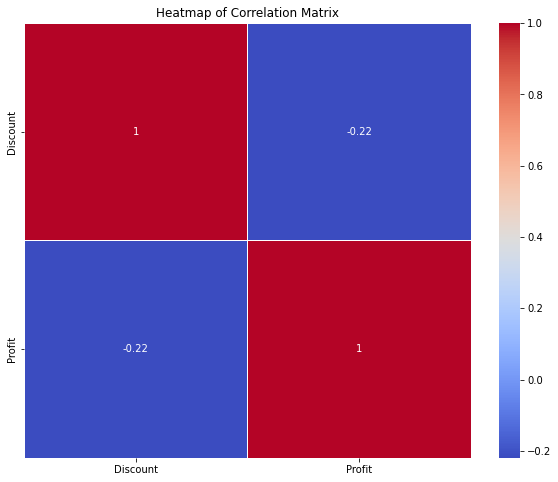

Koefisien Regresi Linier: [-249.0497617]
Intersep: 67.55963755270152
p-value dari uji t: 4.431631248692115e-56
Terdapat cukup bukti statistik untuk menolak hipotesis nol (H0).
Menerima hipotesis alternatif (Ha): Ada perbedaan signifikan dalam profit antara produk yang diberikan diskon dan produk yang tidak diberikan diskon.


In [120]:
# 1. Korelasi
# Menghitung korelasi Spearman
spearman_corr, _ = spearmanr(df_clean['Discount'], df_clean['Profit'])
print("Korelasi Spearman antara Discount dan Profit:", spearman_corr)

# 2. Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Discount','Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Discount dan Profit')
plt.show()

# 3. Regresi
# Melakukan regresi linier sederhana
X = df_clean[['Discount']]
y = df_clean['Profit']
regression = LinearRegression().fit(X, y)
print("Koefisien Regresi Linier:", regression.coef_)
print("Intersep:", regression.intercept_)

# 4. Uji Hipotesis
# Memisahkan data menjadi dua kelompok berdasarkan apakah produk diberikan diskon atau tidak
discounted_products = df_clean[df_clean['Discount'] > 0]['Profit']
non_discounted_products = df_clean[df_clean['Discount'] == 0]['Profit']

# Melakukan uji hipotesis (uji t)
t_statistic, p_value = ttest_ind(discounted_products, non_discounted_products)
print("p-value dari uji t:", p_value)
alpha = 0.05  # Tingkat signifikansi yang dipilih

if p_value < alpha:
    print("Terdapat cukup bukti statistik untuk menolak hipotesis nol (H0).")
    print("Menerima hipotesis alternatif (Ha): Ada perbedaan signifikan dalam profit antara produk yang diberikan diskon dan produk yang tidak diberikan diskon.")
else:
    print("Tidak cukup bukti statistik untuk menolak hipotesis nol (H0).")
    print("Menerima hipotesis nol (H0): Tidak ada perbedaan signifikan dalam profit antara produk yang diberikan diskon dan produk yang tidak diberikan diskon.")


### Dari hasil analisis yang dilakukan, kita dapat membuat kesimpulan sebagai berikut:
1. **Koefisien Regresi Linier**: Koefisien regresi linier yang didapatkan sebesar -249.0497617 menunjukkan bahwa ada hubungan yang negatif antara variabel Discount (produk yang diberikan diskon) dengan Profit yang dihasilkan. Artinya, semakin besar diskon yang diberikan pada suatu produk, maka Profit yang dihasilkan cenderung menurun.

2. **Intersep**: Intersep sebesar 67.55963755270152 menunjukkan bahwa jika tidak ada diskon yang diberikan (Discount = 0), maka Profit yang dihasilkan akan sekitar 67.56.

3. **p-value dari uji t**: Nilai p-value yang sangat kecil (4.431631248692115e-56) menunjukkan bahwa ada perbedaan yang signifikan dalam Profit antara produk yang diberikan diskon dan produk yang tidak diberikan diskon. Oleh karena itu, kita menolak hipotesis nol (H0) yang menyatakan bahwa tidak ada perbedaan antara keduanya.

4. **Hipotesis Alternatif**: Kita menerima hipotesis alternatif (Ha) yang menyatakan bahwa ada perbedaan signifikan dalam Profit antara produk yang diberikan diskon dan produk yang tidak diberikan diskon. Dengan kata lain, adanya diskon pada produk memiliki dampak yang signifikan terhadap Profit yang dihasilkan.

Berdasarkan kesimpulan di atas, pihak Saas Sales dapat mempertimbangkan untuk mengevaluasi strategi diskon yang ada dan mengoptimalkan strategi penetapan harga untuk meningkatkan profitabilitas produk. Mungkin perlu dilakukan penyesuaian pada tingkat diskon yang diberikan atau pada produk tertentu yang mendapatkan diskon untuk memaksimalkan profitabilitas.

# Kesimpulan
1. Pemahaman Terhadap Karakteristik Pelanggan: Penting untuk memahami karakteristik pelanggan dalam berbagai segmen (High Value, Medium Value, Low Value) serta tingkat keloyalan mereka. Ini membantu dalam merancang strategi pemasaran yang efisien dan efektif.

2. Segmentasi Pelanggan: Segmentasi pelanggan berdasarkan nilai transaksi mereka memberikan wawasan yang berharga. Fokus pada segmen High Value untuk mempertahankan pendapatan utama, segmen Medium Value untuk meningkatkan frekuensi transaksi, dan segmen Low Value untuk meningkatkan nilai transaksi dan keterlibatan.

3. Strategi yang Direkomendasikan: Setiap segmen memerlukan pendekatan yang berbeda. Untuk High Value, penting untuk menjaga loyalitas dan meningkatkan nilai transaksi per pelanggan. Medium Value memerlukan upaya untuk meningkatkan frekuensi transaksi, sementara Low Value memerlukan strategi untuk meningkatkan nilai transaksi dan keterlibatan.

4. Analisis Produk Paling Diminati: Memahami produk atau layanan yang paling diminati dalam setiap segmen dapat membantu dalam mengarahkan upaya pemasaran dan pengembangan produk. Produk yang diminati dalam segmen High Value dan Medium Value bisa menjadi fokus pengembangan lebih lanjut.

5. Potensi Pengembangan: Terdapat potensi untuk pengembangan lebih lanjut dalam setiap segmen, baik itu meningkatkan nilai transaksi, frekuensi transaksi, atau keterlibatan pelanggan. Strategi harus dirancang untuk memanfaatkan potensi tersebut secara maksimal.

Dengan memahami karakteristik pelanggan dan pola pembelian mereka, serta menerapkan strategi yang tepat untuk setiap segmen, perusahaan dapat meningkatkan efisiensi strategi pemasaran mereka dan mencapai pertumbuhan yang lebih baik dalam jangka panjang.

# Rekomendasi:

1. Pemahaman Terhadap Karakteristik Pelanggan:
    - Lakukan analisis mendalam tentang karakteristik pelanggan dalam setiap segmen, termasuk preferensi, perilaku pembelian, dan tingkat keloyalan.
    - Gunakan data historis dan alat analisis yang tepat untuk mengidentifikasi tren dan pola yang dapat memberikan wawasan lebih lanjut tentang kebutuhan dan preferensi pelanggan.

2. Segmentasi Pelanggan:
    - Gunakan segmentasi pelanggan berdasarkan nilai transaksi untuk mengarahkan strategi pemasaran dengan lebih tepat.
    - Identifikasi segmentasi yang paling menguntungkan dan alokasikan sumber daya dengan proporsional untuk memaksimalkan hasil.

3. Strategi yang Direkomendasikan:
    - Sesuaikan strategi pemasaran dan retensi untuk setiap segmen. Prioritaskan program VIP atau premium untuk segmen High Value, program loyalitas untuk segmen Medium Value, dan kampanye diskon atau promosi untuk segmen Low Value.
    - Pertimbangkan personalisasi dalam setiap interaksi dengan pelanggan untuk meningkatkan keterlibatan dan kepuasan mereka.

4. Analisis Produk Paling Diminati:
    -   Gunakan informasi tentang produk yang paling diminati dalam setiap segmen untuk mengarahkan upaya pengembangan produk dan penawaran lebih lanjut.
    -   Perhatikan tren dan perubahan dalam preferensi produk untuk menyesuaikan portofolio produk sesuai dengan kebutuhan pelanggan.

5. Potensi Pengembangan:
    - Identifikasi peluang untuk meningkatkan nilai transaksi, frekuensi transaksi, dan keterlibatan pelanggan dalam setiap segmen.
    - Rancang strategi pemasaran dan promosi yang tepat untuk memanfaatkan potensi pengembangan tersebut.

Dengan menerapkan rekomendasi ini, perusahaan dapat lebih efektif dalam merancang strategi pemasaran yang sesuai dengan kebutuhan dan preferensi pelanggan dalam setiap segmen, yang pada gilirannya akan meningkatkan efisiensi dan pertumbuhan bisnis mereka.

In [87]:
merged_df = pd.merge(df_clean, rfm_df, on='Customer', how='inner')
merged_df.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,...,Total,Month,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,523.920,2022-11,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,...,2195.820,2022-11,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
2,AMER-2020-118962,2020-08-05,20200805,Warren Forsyth,United States,New York City,AMER,NAMER,Chevron,1017,...,62.820,2020-08,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
3,AMER-2020-118962,2020-08-05,20200805,Warren Forsyth,United States,New York City,AMER,NAMER,Chevron,1017,...,221.920,2020-08,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers
4,AMER-2020-118962,2020-08-05,20200805,Warren Forsyth,United States,New York City,AMER,NAMER,Chevron,1017,...,2381.008,2020-08,4,151,148001.29,78.46,91.41,77.78,4.08,High Value Customers


In [115]:
merged_df.to_csv("SaasSalesCleanedFix.csv", index=False)